# **Análise dos Resultados:**

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
df_sentimento_revisto = pd.read_csv('../output/sentimento_revisto.csv', index_col=0)

In [4]:
df_original = pd.read_csv('../output/cleaning_output.csv', index_col=0)

# Contagem de sentimentos

Após as análises iniciais, foi identificado um alto número de comentários classificados como neutros e, a maioria deles, incluia comentários só com emojis e, dessa maneira, essa tag foi reclassificada na mão, sendo -1 negativo, 0, neutro e 1 positivo.

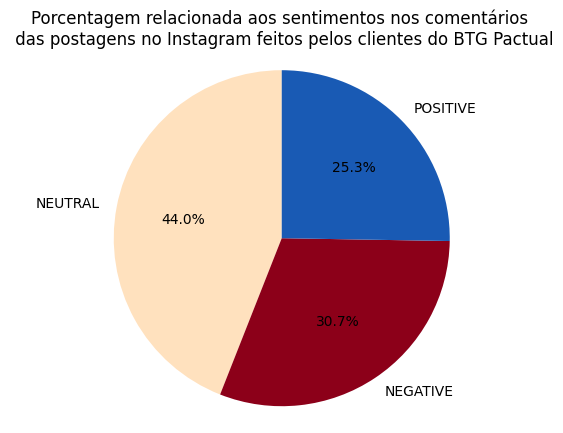

In [6]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_original['sentimento'].value_counts()

# Cria um gráfico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos comentários \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gráfico
plt.show()

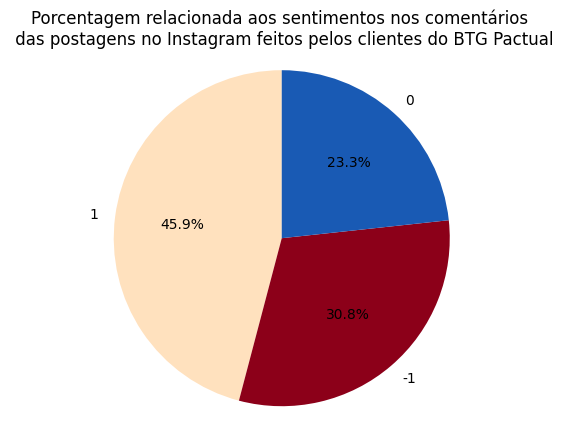

In [7]:
# Lista de cores
colors = ['#FFE1BE', '#8C0019', '#195AB4']

# Contagem de sentimentos
fellings = df_sentimento_revisto['sentimento_revisto'].value_counts()

# Cria um gráfico de pizza com as contagens de sentimentos
fig, ax = plt.subplots()
ax.pie(fellings.values, labels=fellings.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')

plt.title('Porcentagem relacionada aos sentimentos nos comentários \n das postagens no Instagram feitos pelos clientes do BTG Pactual')

# Mostra o gráfico
plt.show()

# Comparações dos modelos

Foram feitos os mesmos modelos, entretanto que se diferenciam em dois pontos: target de sentimento, usado tanto da base original fornecida pelo stakeholder, quanto a revista, e no tipo de vetorização das frases, sendo Bag of Words, TF-IDF e Word2Vec.

## Bag of Words

Abaixo, as métricas obtidas utilizando Bag of Words

In [8]:

# Dados para a tabela
dados = [
    ["Naive Bayes Simples", 'Original', 54, 54],
    ["Naive Bayes Simples", 'Revisto', 73, 73],
    ["Naive Bayes com cross validation", "Original", 72 , 72],
    ["Naive Bayes com cross validation", "Revisto", 61 , 61],
    ["Naive Bayes com Grid Search e Cross Validation", "Original", 72, 72],
    ["Naive Bayes com Grid Search e Cross Validation","Revisto", 70, 70],
    ["Random Forest", "Original", 70, 70],
    ["Random Forest", "Revisto", 69, 69],
    ["Rede Neural", "Original", 58, 'Null'],
    ["Rede Neural", "Revisto", 47, 'Null']

]

# Cabeçalho da tabela
cabecalho = ["Modelo", "Dataset", "Acurácia", "Recall"]

# Exibir a tabela formatada
print(tabulate(dados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════════════════════╤═══════════╤════════════╤══════════╕
│ Modelo                                         │ Dataset   │   Acurácia │ Recall   │
╞════════════════════════════════════════════════╪═══════════╪════════════╪══════════╡
│ Naive Bayes Simples                            │ Original  │         54 │ 54       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes Simples                            │ Revisto   │         70 │ 70       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Original  │         72 │ 72       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Revisto   │         61 │ 61       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com Grid Search e Cross Valid

Analisando a tabela, é possível ver que os modelos com melhor resultado, tanto em acurácia, quanto em recall, foram o Naive Bayes Simples com cross validation com o dataset original e o Random Forest com o dataset original.

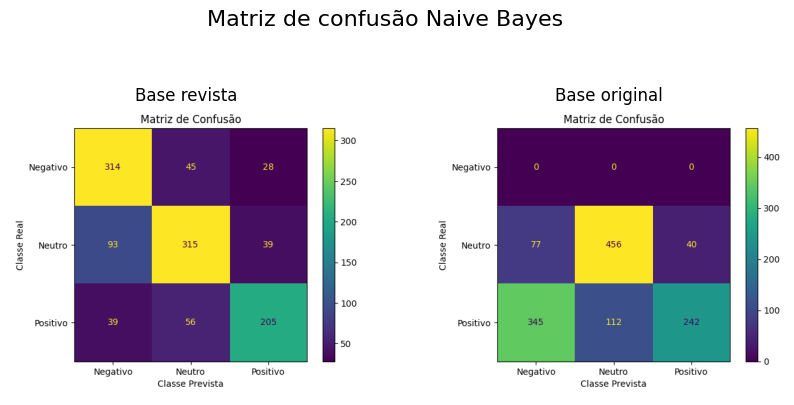

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

# Carregar as duas imagens
imagem1 = Image.open('../images/bow_nb_revisto.png')
imagem2 = Image.open('../images/bow_nb_original.png')

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Exibir a primeira imagem no primeiro subplot e adicionar o título
axs[0].imshow(imagem1)
axs[0].set_title('Base revista')
axs[0].axis('off')

# Exibir a segunda imagem no segundo subplot e adicionar o título
axs[1].imshow(imagem2)
axs[1].set_title('Base original')
axs[1].axis('off')

# Ajustar o espaçamento entre os subplots
plt.suptitle('Matriz de confusão Naive Bayes', fontsize=16)

# Exibir a figura
plt.show()



É possível ver que, mesmo tendo menor recall e acurácia, a base revista acerta mais os diferentes rótulos de sentimentos, pois, como visto acima, a base original tende para neutros e não acertou nenhum negativo, sendo que identificar negativos é o principal objetivo do modelo e, alem disso, apresenta uma alta ocorrência de falsos negativos para os comentários positivos. Por outro lado a base revista acerta mais negativos e neutros.

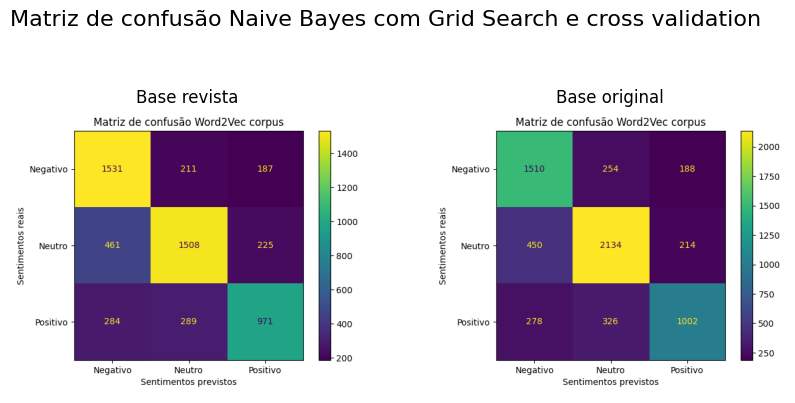

In [35]:
import matplotlib.pyplot as plt
from PIL import Image

# Carregar as duas imagens
imagem1 = Image.open('../images/bow_nbgscv_revisto.png')
imagem2 = Image.open('../images/bow_nbgscv_original.png')

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Exibir a primeira imagem no primeiro subplot e adicionar o título
axs[0].imshow(imagem1)
axs[0].set_title('Base revista')
axs[0].axis('off')

# Exibir a segunda imagem no segundo subplot e adicionar o título
axs[1].imshow(imagem2)
axs[1].set_title('Base original')
axs[1].axis('off')

# Ajustar o espaçamento entre os subplots
plt.suptitle('Matriz de confusão Naive Bayes com Grid Search e cross validation', fontsize=16)

# Exibir a figura
plt.show()



É possível ver que, mesmo tendo menor recall e acurácia, a base revista acerta mais os diferentes rótulos de sentimentos, pois, como visto acima, a base original tende para neutros, enquanto a base revista acerta mais negativos e neutros.

## TF-IDF

In [13]:

# Dados para a tabela
dados = [
    ["Naive Bayes Simples", 'Original', 53, 53],
    ["Naive Bayes Simples", 'Revisto', 69, 69],
    ["Naive Bayes com cross validation", "Original", 71 , 71],
    ["Naive Bayes com cross validation", "Revisto", 70 , 70],
    ["Naive Bayes com Grid Search e Cross Validation", "Original", 71, 71],
    ["Naive Bayes com Grid Search e Cross Validation","Revisto", 70, 70],
    ["Random Forest", "Original", 71, 71],
    ["Random Forest", "Revisto", 70, 70],
    ["Rede Neural", "Original", 57, 'Null'],
    ["Rede Neural", "Revisto", 46, 'Null']

]

# Cabeçalho da tabela
cabecalho = ["Modelo", "Dataset", "Acurácia", "Recall"]

# Exibir a tabela formatada
print(tabulate(dados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════════════════════╤═══════════╤════════════╤══════════╕
│ Modelo                                         │ Dataset   │   Acurácia │ Recall   │
╞════════════════════════════════════════════════╪═══════════╪════════════╪══════════╡
│ Naive Bayes Simples                            │ Original  │         53 │ 53       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes Simples                            │ Revisto   │         69 │ 69       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Original  │         71 │ 71       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Revisto   │         56 │ 56       │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com Grid Search e Cross Valid

Analisando a tabela, é possível ver que os modelos com melhor resultado, tanto em acurácia, quanto em recall, foi o Naive Bayes com cross validation com o dataset original.

### Matrizes de confusão 

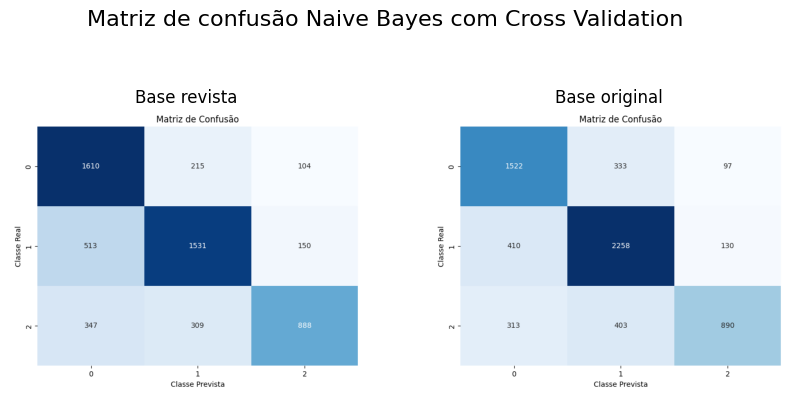

In [32]:
import matplotlib.pyplot as plt
from PIL import Image

# Carregar as duas imagens
imagem1 = Image.open('../images/tfidf_nbcv_revisto.png')
imagem2 = Image.open('../images/tfidf_nbcv_original.png')

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Exibir a primeira imagem no primeiro subplot e adicionar o título
axs[0].imshow(imagem1)
axs[0].set_title('Base revista')
axs[0].axis('off')

# Exibir a segunda imagem no segundo subplot e adicionar o título
axs[1].imshow(imagem2)
axs[1].set_title('Base original')
axs[1].axis('off')

# Ajustar o espaçamento entre os subplots
plt.suptitle('Matriz de confusão Naive Bayes com Cross Validation', fontsize=16)

# Exibir a figura
plt.show()


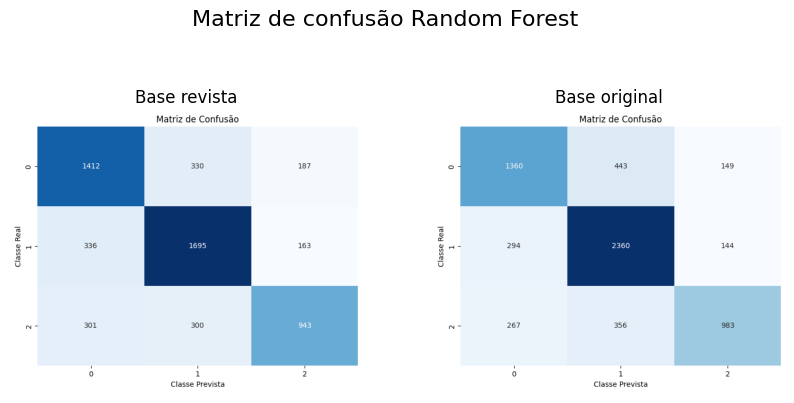

In [33]:
import matplotlib.pyplot as plt
from PIL import Image

# Carregar as duas imagens
imagem1 = Image.open('../images/tfidf_rf_revisto.png')
imagem2 = Image.open('../images/tfidf_rf_original.png')

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Exibir a primeira imagem no primeiro subplot e adicionar o título
axs[0].imshow(imagem1)
axs[0].set_title('Base revista')
axs[0].axis('off')

# Exibir a segunda imagem no segundo subplot e adicionar o título
axs[1].imshow(imagem2)
axs[1].set_title('Base original')
axs[1].axis('off')

# Ajustar o espaçamento entre os subplots
plt.suptitle('Matriz de confusão Random Forest', fontsize=16)

# Exibir a figura
plt.show()


Após a análise das matrizes, deve-se lembrar que o foco do modelo de processamento de linguagem natural é identificar, principalmente, comentários com sentimento negativo e, dessa maneira, os modelos que utilizaram a base revista identificaram melhor comentários negativos e positivos, diferente da base original, que mais acerta comentários neutros.

## Word2Vec

In [ ]:

# Dados para a tabela
dados = [
    ["Naive Bayes", 'Corpus', 60, 55],
    ["Naive Bayes", 'Vetores pré treinados', 58, 54],
]

# Cabeçalho da tabela
cabecalho = ["Modelo", "Dataset", "Acurácia", "Recall"]

# Exibir a tabela formatada
print(tabulate(dados, headers=cabecalho, tablefmt="fancy_grid"))
